# **PCA**







#Step 1 : import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline
from sklearn.decomposition import PCA
%matplotlib inline

#Step 2: Importing the data set

###Import the dataset and distributing the dataset into X and y components for data analysis.




In [4]:
cancer = load_breast_cancer(as_frame=True)
cancer.data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
df = cancer.frame

#Step 3 : Step 3: Splitting the dataset into the Training set and Test set





In [9]:
X = df[cancer['feature_names']]
y = load_breast_cancer().target

In [11]:
X_mean, X_std = X.mean(), X.std()
Z = (X - X_mean) / X_std

In [13]:
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size = .2, random_state = 42)

#Step 4: Feature Scaling
###Doing the pre-processing part on training and testing set such as fitting the Standard scale.






#Step 5: Applying PCA function
###Applying the PCA function into the training and testing set for analysis.




In [17]:
pca = PCA(n_components = 2)
pca.fit(Z)
x_pca = pca.transform(Z)

pca_df = pd.DataFrame(x_pca, columns = ['PCA_1', 'PCA_2'])
pca_df

,PCA_1,PCA_2
0,9.184755,1.946870
1,2.385703,-3.764859
2,5.728855,-1.074229
3,7.116691,10.266556
4,3.931842,-1.946359
...,...,...
564,6.433655,-3.573673
565,3.790048,-3.580897
566,1.255075,-1.900624
567,10.365673,1.670540


#Step 6: Fitting Logistic Regression To the training set




In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

#Step 7: Predicting the test set result




In [23]:
y_pred_log = lr.predict(X_test)

#Step 8: Making the confusion matrix




In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_log)

array([[41,  2],
       [ 1, 70]], dtype=int64)

#Step 9: Predicting the training set result




In [29]:
confusion_matrix(y_train, lr.predict(X_train))

array([[165,   4],
       [  2, 284]], dtype=int64)

#Step 10: Visualizing the Test set results




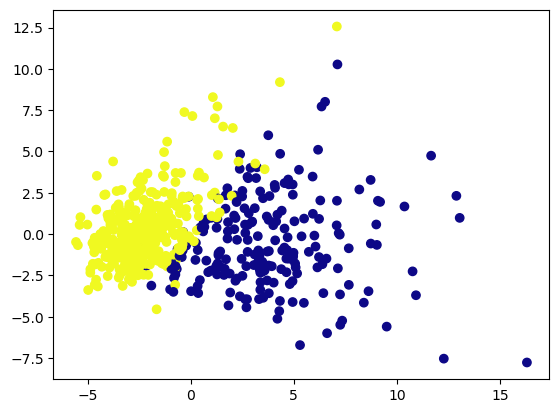

In [32]:
plt.figure()

plt.scatter(x_pca[:,0], x_pca[:,1], c = y, cmap = 'plasma');

#**Well Done :)**
Now let's practice!